In [296]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

pd.set_option("max_rows", 60)

flights = pd.read_csv('csv/flights.csv', index_col='flight')
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
flight,,,,,,,,,,,,,,,,,,
1545,2013,1,1,517,515,2,830,819,11,UA,N14228,EWR,IAH,227,1400,5,15,2013-01-01T05:00:00Z
1714,2013,1,1,533,529,4,850,830,20,UA,N24211,LGA,IAH,227,1416,5,29,2013-01-01T05:00:00Z
1141,2013,1,1,542,540,2,923,850,33,AA,N619AA,JFK,MIA,160,1089,5,40,2013-01-01T05:00:00Z
725,2013,1,1,544,545,-1,1004,1022,-18,B6,N804JB,JFK,BQN,183,1576,5,45,2013-01-01T05:00:00Z
461,2013,1,1,554,600,-6,812,837,-25,DL,N668DN,LGA,ATL,116,762,6,0,2013-01-01T06:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3393,2013,9,30,,1455,,,1634,,9E,,JFK,DCA,,213,14,55,2013-09-30T14:00:00Z
3525,2013,9,30,,2200,,,2312,,9E,,LGA,SYR,,198,22,0,2013-09-30T22:00:00Z
3461,2013,9,30,,1210,,,1330,,MQ,N535MQ,LGA,BNA,,764,12,10,2013-09-30T12:00:00Z


In [42]:
# On compte le nombre d'aéroports de destination
count_destinations_airport = flights.dest.nunique()
print(count_destinations_airport)

105


In [34]:
# On compte le nombre d'aéroports de départ
count_departures_airport = flights.origin.nunique()
print(count_departures_airport)

3


In [4]:
airports = pd.read_csv('csv/airports.csv', index_col='faa')
airlines = pd.read_csv('csv/airlines.csv', index_col='carrier')
planes = pd.read_csv('csv/planes.csv', index_col='tailnum')
weather = pd.read_csv('csv/weather.csv')
weather_with_3_doublons = pd.read_csv('csv/weather_with_3_doublons.csv')

airports

,name,lat,lon,alt,tz,dst,tzone
faa,,,,,,,
04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
...,...,...,...,...,...,...,...
ZUN,Black Rock,35.083228,-108.791778,6454,-7,A,America/Denver
ZVE,New Haven Rail Station,41.298669,-72.925992,7,-5,A,America/New_York
ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0,-5,A,America/New_York


In [40]:
# 1) Nombre d'aéroports
total_count_airports = airports.index.nunique()
print(total_count_airports)

1458


In [37]:
# Aéroports qui ne passent pas à l'heure d'été (= no dst)
no_dst_airports = airports['dst'].value_counts()['N']
print(f'Airports which dont use summer time {no_dst_airports}')

# nombre de timezones
nb_timezones = airports.tzone.nunique()
print(f'Number of timzones {nb_timezones}')

Airports which dont use summer time 23
Number of timzones 10


In [44]:
# nombre de compagnies
airlines_count = len(airlines.index)
print(airlines_count)

16


In [39]:
# nombre d'avions
planes_count = len(planes.index)
print(planes_count)

3322


## Nombre de vols annulés

In [46]:
len(flights[flights['dep_time'] == ' '])

8255

## Aeroports de départ le plus empreinté 

In [55]:
flights['origin'].value_counts(ascending=False).head(1)

EWR    120835
Name: origin, dtype: int64

## Aeroports de destination les plus/moins empreintés

In [210]:
dests = flights['dest'].value_counts(ascending = False).head(10)
dests_less_used = flights['dest'].value_counts(ascending = True).head(10)

In [211]:
dests = dests.reset_index()
dests_less_used = dests_less_used.reset_index()
dests.columns =['faa' , 'dest']
dests_less_used.columns = ['faa', 'dest']

In [218]:
dest_airports_most_used = pd.merge(dests, airports[['name']], how='left', on='faa')
dest_airports_less_used = pd.merge(dests_less_used, airports[['name']], how='left', on='faa')

In [215]:
dest_airports_most_used['Pourcentage (%)'] = (dest_airports_most_used["dest"]/flights["dest"].value_counts().sum())* 100
dest_airports_less_used['Pourcentage (%)'] = (dest_airports_less_used["dest"]/flights["dest"].value_counts().sum())* 100

### Les moins empreintés

In [217]:
dest_airports_less_used

,faa,dest,name,Pourcentage (%)
0,LEX,1,Blue Grass,0.000297
1,LGA,1,La Guardia,0.000297
2,ANC,8,Ted Stevens Anchorage Intl,0.002375
3,SBN,10,South Bend Rgnl,0.002969
4,MTJ,15,Montrose Regional Airport,0.004454
5,HDN,15,Yampa Valley,0.004454
6,EYW,17,Key West Intl,0.005048
7,PSP,19,Palm Springs Intl,0.005642
8,JAC,25,Jackson Hole Airport,0.007423
9,BZN,36,Gallatin Field,0.010690


### Les plus empreintés

In [216]:
dest_airports_most_used

,faa,dest,name,Pourcentage (%)
0,ORD,17283,Chicago Ohare Intl,5.131898
1,ATL,17215,Hartsfield Jackson Atlanta Intl,5.111706
2,LAX,16174,Los Angeles Intl,4.802599
3,BOS,15508,General Edward Lawrence Logan Intl,4.604841
4,MCO,14082,Orlando Intl,4.181414
5,CLT,14064,Charlotte Douglas Intl,4.176070
6,SFO,13331,San Francisco Intl,3.958417
7,FLL,12055,Fort Lauderdale Hollywood Intl,3.579531
8,MIA,11728,Miami Intl,3.482433
9,DCA,9705,Ronald Reagan Washington Natl,2.881737


In [258]:
planes_most_used = flights['tailnum'].value_counts(ascending = False).head(10)
planes_less_used = flights['tailnum'].value_counts(ascending = True).head(10)
planes_most_used

          2512
N725MQ     575
N722MQ     513
N723MQ     507
N711MQ     486
N713MQ     483
N258JB     427
N298JB     407
N353JB     404
N351JB     402
Name: tailnum, dtype: int64

In [259]:
planes_most_used = planes_most_used.reset_index()
planes_less_used = planes_less_used.reset_index()
planes_most_used.columns = ['tailnum', 'count flights']
planes_less_used.columns = ['tailnum', 'count flights']

In [260]:
planes_most_used = pd.merge(planes_most_used, planes[['type', 'manufacturer', 'model']], how='left', on='tailnum')
planes_less_used = pd.merge(planes_less_used, planes[['type', 'manufacturer', 'model']], how='left', on='tailnum')

In [261]:
# 10 avions les plus utilisés
planes_most_used

,tailnum,count flights,type,manufacturer,model
0,,2512,NaN,NaN,NaN
1,N725MQ,575,NaN,NaN,NaN
2,N722MQ,513,NaN,NaN,NaN
3,N723MQ,507,NaN,NaN,NaN
4,N711MQ,486,Fixed wing multi engine,GULFSTREAM AEROSPACE,G1159B
5,N713MQ,483,NaN,NaN,NaN
6,N258JB,427,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW
7,N298JB,407,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW
8,N353JB,404,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW
9,N351JB,402,Fixed wing multi engine,EMBRAER,ERJ 190-100 IGW


In [262]:
# 10 avions les moins utilisés
planes_less_used

,tailnum,count flights,type,manufacturer,model
0,N922EV,1,Fixed wing multi engine,BOMBARDIER INC,CL-600-2B19
1,N647MQ,1,NaN,NaN,NaN
2,N502SW,1,NaN,NaN,NaN
3,N830AW,1,Fixed wing multi engine,AIRBUS INDUSTRIE,A319-132
4,N8619F,1,Fixed wing multi engine,BOEING,737-8H4
5,N587NW,1,Fixed wing multi engine,BOEING,757-351
6,N590NW,1,Fixed wing multi engine,BOEING,757-351
7,N776SK,1,Fixed wing multi engine,BOMBARDIER INC,CL-600-2C10
8,N929DN,1,Fixed wing multi engine,MCDONNELL DOUGLAS,MD-90-30
9,N624AW,1,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-231


### 3 -

In [293]:
flightsbycarrier_dest= flights.groupby("carrier")["dest"].count()
flightsbycarrier_dest

carrier
9E    18460
AA    32729
AS      714
B6    54635
DL    48110
EV    54173
F9      685
FL     3260
HA      342
MQ    26397
OO       32
UA    58665
US    20536
VX     5162
WN    12275
YV      601
Name: dest, dtype: int64

In [294]:
nombre_destination_par_compagnie=pd.merge(flightsbycarrier_dest, airlines, how='left', on='carrier')
nombre_destination_par_compagnie

,dest,name
carrier,,
9E,18460,Endeavor Air Inc.
AA,32729,American Airlines Inc.
AS,714,Alaska Airlines Inc.
B6,54635,JetBlue Airways
DL,48110,Delta Air Lines Inc.
EV,54173,ExpressJet Airlines Inc.
F9,685,Frontier Airlines Inc.
FL,3260,AirTran Airways Corporation
HA,342,Hawaiian Airlines Inc.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Endeavor Air Inc.'),
  Text(1, 0, 'American Airlines Inc.'),
  Text(2, 0, 'Alaska Airlines Inc.'),
  Text(3, 0, 'JetBlue Airways'),
  Text(4, 0, 'Delta Air Lines Inc.'),
  Text(5, 0, 'ExpressJet Airlines Inc.'),
  Text(6, 0, 'Frontier Airlines Inc.'),
  Text(7, 0, 'AirTran Airways Corporation'),
  Text(8, 0, 'Hawaiian Airlines Inc.'),
  Text(9, 0, 'Envoy Air'),
  Text(10, 0, 'SkyWest Airlines Inc.'),
  Text(11, 0, 'United Air Lines Inc.'),
  Text(12, 0, 'US Airways Inc.'),
  Text(13, 0, 'Virgin America'),
  Text(14, 0, 'Southwest Airlines Co.'),
  Text(15, 0, 'Mesa Airlines Inc.')])

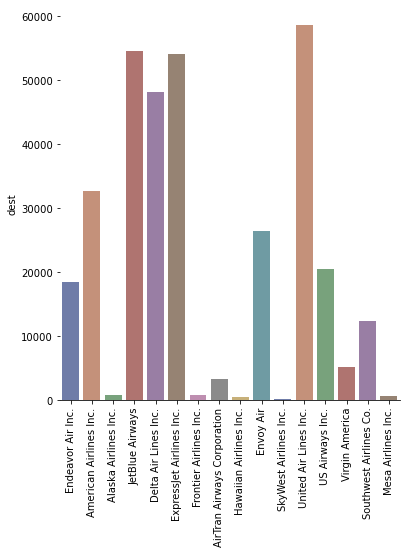

In [298]:
g = sb.catplot(data=nombre_destination_par_compagnie, kind="bar", x="name", y="dest", ci="sd", palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "dest")
plt.xticks(rotation='vertical')

In [299]:
flightsbycarrier_origin= flights.groupby(["carrier","origin"], as_index= True)['origin'].count()
flightsbycarrier_origin

carrier  origin
9E       EWR        1268
         JFK       14651
         LGA        2541
AA       EWR        3487
         JFK       13783
         LGA       15459
AS       EWR         714
B6       EWR        6557
         JFK       42076
         LGA        6002
DL       EWR        4342
         JFK       20701
         LGA       23067
EV       EWR       43939
         JFK        1408
         LGA        8826
F9       LGA         685
FL       LGA        3260
HA       JFK         342
MQ       EWR        2276
         JFK        7193
         LGA       16928
OO       EWR           6
         LGA          26
UA       EWR       46087
         JFK        4534
         LGA        8044
US       EWR        4405
         JFK        2995
         LGA       13136
VX       EWR        1566
         JFK        3596
WN       EWR        6188
         LGA        6087
YV       LGA         601
Name: origin, dtype: int64

### 4 - Trouver tous les vols ayant atterri à Houston (IAH ou HOU)

In [317]:
flights[(flights.dest=='IAH')].count()

year              7198
month             7198
day               7198
dep_time          7198
sched_dep_time    7198
dep_delay         7198
arr_time          7198
sched_arr_time    7198
arr_delay         7198
carrier           7198
tailnum           7198
origin            7198
dest              7198
air_time          7198
distance          7198
hour              7198
minute            7198
time_hour         7198
dtype: int64

In [318]:
flights[(flights.dest=='HOU')].count()

year              2115
month             2115
day               2115
dep_time          2115
sched_dep_time    2115
dep_delay         2115
arr_time          2115
sched_arr_time    2115
arr_delay         2115
carrier           2115
tailnum           2115
origin            2115
dest              2115
air_time          2115
distance          2115
hour              2115
minute            2115
time_hour         2115
dtype: int64

In [321]:
## A REVOIR
flights_houston = flights[(flights.dest=='IAH')] + flights[(flights.dest=='HOU')]
flights_houston.shape[0]

15039

In [322]:
#Combien de vols partent de NYC airports vers Seattle
flights_nyc=flights[flights.dest=='SEA']
flights_nyc.shape[0]

3923

In [323]:
flights_nyc=flights[flights.dest=='SEA']
print(len(flights_nyc.carrier.unique()))
print(flights_nyc.carrier.unique())

5
['AS' 'DL' 'UA' 'B6' 'AA']


In [324]:
# combien d’avions desservent cette destination
print(len(flights_nyc.tailnum.unique()))

936


### 5 - 

In [300]:
flights['dest'].value_counts(ascending=False)

ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
       ...  
MTJ       15
SBN       10
ANC        8
LGA        1
LEX        1
Name: dest, Length: 105, dtype: int64

### 6 - nombres d'aéroports de destination & départ

In [277]:
origin_per_airline = flights.groupby(['carrier'])['origin'].nunique()
dest_per_airline = flights.groupby(['carrier'])['dest'].nunique()
res = pd.merge(dest_per_airline, origin_per_airline, how='left', on='carrier')
res = pd.merge(res, airlines, how='inner', on='carrier')
res

,dest,origin,name
carrier,,,
9E,49,3,Endeavor Air Inc.
AA,19,3,American Airlines Inc.
AS,1,1,Alaska Airlines Inc.
B6,42,3,JetBlue Airways
DL,40,3,Delta Air Lines Inc.
EV,61,3,ExpressJet Airlines Inc.
F9,1,1,Frontier Airlines Inc.
FL,3,1,AirTran Airways Corporation
HA,1,1,Hawaiian Airlines Inc.


In [279]:
# compagnies qui n'ont pas tous les aéroports d'origine
print(res[res.origin < flights['origin'].nunique()])

         dest  origin                         name
carrier                                           
AS          1       1         Alaska Airlines Inc.
F9          1       1       Frontier Airlines Inc.
FL          3       1  AirTran Airways Corporation
HA          1       1       Hawaiian Airlines Inc.
OO          5       2        SkyWest Airlines Inc.
VX          5       2               Virgin America
WN         11       2       Southwest Airlines Co.
YV          3       1           Mesa Airlines Inc.


In [284]:
# compagnies qui desservent toutes les destinations (aucune)
print(res[res.origin == flights['dest'].nunique()])

Empty DataFrame
Columns: [dest, origin, name]
Index: []


In [276]:
airlines

,name
carrier,
9E,Endeavor Air Inc.
AA,American Airlines Inc.
AS,Alaska Airlines Inc.
B6,JetBlue Airways
DL,Delta Air Lines Inc.
EV,ExpressJet Airlines Inc.
F9,Frontier Airlines Inc.
FL,AirTran Airways Corporation
HA,Hawaiian Airlines Inc.


In [15]:
weather

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,0,37.04,21.92,53.97,230,10.357019999999999,11.918651475599997,0.0,1013.9,10.0,2013-01-01T00:00:00Z
1,EWR,2013,1,1,1,37.04,21.92,53.97,230,13.809359999999998,15.891535300799996,0.0,1013,10.0,2013-01-01T01:00:00Z
2,EWR,2013,1,1,2,37.94,21.92,52.09,230,12.658579999999999,14.567240692399997,0.0,1012.6,10.0,2013-01-01T02:00:00Z
3,EWR,2013,1,1,3,37.94,23,54.51,230,13.809359999999998,15.891535300799996,0.0,1012.7,10.0,2013-01-01T03:00:00Z
4,EWR,2013,1,1,4,37.94,24.08,57.04,240,14.960139999999999,17.215829909199996,0.0,1012.8,10.0,2013-01-01T04:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26125,LGA,2013,12,30,19,35.96,19.94,51.78,340,13.809359999999998,15.891535300799996,0.0,1017.1,10.0,2013-12-30T19:00:00Z
26126,LGA,2013,12,30,20,33.98,17.06,49.51,330,17.261699999999998,19.864419125999994,0.0,1018.8,10.0,2013-12-30T20:00:00Z
26127,LGA,2013,12,30,21,32,15.08,49.19,340,14.960139999999999,17.215829909199996,0.0,1019.5,10.0,2013-12-30T21:00:00Z
26128,LGA,2013,12,30,22,30.92,12.92,46.74,320,17.261699999999998,19.864419125999994,0.0,1019.9,10.0,2013-12-30T22:00:00Z


In [16]:
weather_with_3_doublons

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26110,LGA,2013,12,30,14,35.96,19.94,51.78,340.0,13.80936,21.86482,0.0,1017.1,10.0,2013-12-30T19:00:00Z
26111,LGA,2013,12,30,15,33.98,17.06,49.51,330.0,17.26170,21.86482,0.0,1018.8,10.0,2013-12-30T20:00:00Z
26112,LGA,2013,12,30,16,32.00,15.08,49.19,340.0,14.96014,23.01560,0.0,1019.5,10.0,2013-12-30T21:00:00Z
26113,LGA,2013,12,30,17,30.92,12.92,46.74,320.0,17.26170,NaN,0.0,1019.9,10.0,2013-12-30T22:00:00Z
